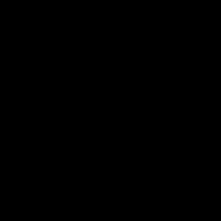

# ... lunching using pid = 19832	
0	
1	


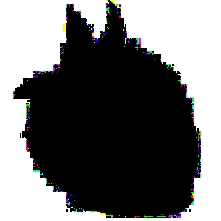

Columns 1 to 10
0,01 *
  0,7349  0,9244  1,0807  0,9253  0,8961  0,8041  0,8894  1,1291  1,0949  1,0336
  1,1303  1,6845  1,7372  1,4645  1,2467  1,1021  1,0790  1,1639  1,3783  1,4129
  1,4442  1,9180  1,9498  1,2742  1,2700  1,2154  1,0250  0,9836  1,3235  1,4372
  1,4397  1,8095  1,8795  1,2701  1,1191  1,0274  0,8794  0,8071  1,0149  1,0784
  1,2991  1,6425  1,6618  1,4318  1,1276  0,9834  0,9962  0,9538  0,9348  1,0635
  1,2069  1,4602  1,5644  1,3299  1,0826  0,9078  1,0513  1,0363  0,9798  1,0343
  1,1117  1,3654  1,4655  1,1644  0,9825  1,0370  1,1019  1,0898  1,0617  1,0440
  1,1671  1,3445  1,2986  1,0678  1,0144  1,0788  1,1244  1,1143  1,0884  1,0574
  1,1601  1,3417  1,3338  1,1814  1,0729  1,1227  1,1385  1,1383  1,1103  1,0746
  1,1974  1,4223  1,4062  1,2295  1,1503  1,1776  1,1545  1,1398  1,1348  1,0916
  1,1860  1,4827  1,3535  1,2745  1,2197  1,1874  1,1517  1,1469  1,1461  1,1040
  1,1517  1,5801  1,3573  1,2123  1,2525  1,2648  1,2017  1,1605  1,1475  1,1083
  1,1

In [3]:
require 'torch'
require 'image'
require 'nn'
require 'src/Tools'
require 'src/ArtistCriterion'
require 'src/SpatialArtisticConvolution'

------------------------------------------------------------------------
-- Command line arguments

local cmd = torch.CmdLine()
cmd:text()
cmd:text('ArtisticNet')
cmd:text()
cmd:text('Options:')
-- settings dataset building
cmd:option('-seed', 1337, 'seed')
cmd:option('-threads', 4, 'threads')

cmd:text()
opt = cmd:parse(arg or {})

------------------------------------------------------------------------
-- Global Effects

Tools.display_pid()

torch.setdefaulttensortype('torch.FloatTensor')
torch.manualSeed(opt.seed)
torch.setnumthreads(opt.threads)


------------------------------------------------------------------------
-- Model


model = nn.Sequential()

-- 18,916,480
model:add(nn.SpatialArtisticConvolution(3, 96, 7, 7, 2, 2))
model:add(nn.ReLU(true))
model:add(nn.SpatialAveragePooling(3, 3, 3, 3))
model:add(nn.SpatialArtisticConvolution(96, 256, 7, 7, 1, 1))
model:add(nn.ReLU(true))
model:add(nn.SpatialAveragePooling(2, 2, 2, 2))
model:add(nn.SpatialArtisticConvolution(256, 512, 3, 3, 1, 1, 1, 1))
model:add(nn.ReLU(true))
model:add(nn.SpatialArtisticConvolution(512, 512, 3, 3, 1, 1, 1, 1))
model:add(nn.ReLU(true))
model:add(nn.SpatialArtisticConvolution(512, 1024, 3, 3, 1, 1, 1, 1))
model:add(nn.ReLU(true))
model:add(nn.SpatialArtisticConvolution(1024, 1024, 3, 3, 1, 1, 1, 1))
model:add(nn.ReLU(true))
-- classifier
-- model:add(nn.SpatialAveragePooling(3, 3, 3, 3))
-- model:add(lf.SpatialConvolution(opt, 1024, 4096, 5, 5, 1, 1))
-- model:add(nn.ReLU(true))
-- model:add(nn.Dropout(opt.dropout))
-- model:add(lf.SpatialConvolution(opt, 4096, 4096, 1, 1, 1, 1))
-- model:add(nn.ReLU(true))
-- model:add(nn.Dropout(opt.dropout))
-- model:add(lf.SpatialConvolution(opt, 4096, nb_class, 1, 1, 1, 1))
-- model:add(nn.View(nb_class))
-- model:add(nn.LogSoftMax())

if opt.pretrain_model then
    local m = model.modules
    local ParamBank = require 'ParamBank'
    local label = require 'overfeat_label'
    local offset = 0
    ParamBank:init("net_weight_1")
    ParamBank:read(        0, {96,3,7,7},      m[offset+1].weight)
    ParamBank:read(    14112, {96},            m[offset+1].bias)
    ParamBank:read(    14208, {256,96,7,7},    m[offset+4].weight)
    ParamBank:read(  1218432, {256},           m[offset+4].bias)
    ParamBank:read(  1218688, {512,256,3,3},   m[offset+7].weight)
    ParamBank:read(  2398336, {512},           m[offset+7].bias)
    ParamBank:read(  2398848, {512,512,3,3},   m[offset+9].weight)
    ParamBank:read(  4758144, {512},           m[offset+9].bias)
    ParamBank:read(  4758656, {1024,512,3,3},  m[offset+11].weight)
    ParamBank:read(  9477248, {1024},          m[offset+11].bias)
    ParamBank:read(  9478272, {1024,1024,3,3}, m[offset+13].weight)
    ParamBank:read( 18915456, {1024},          m[offset+13].bias)
    -- ParamBank:read( 18916480, {4096,1024,5,5}, m[offset+16].weight)
    -- ParamBank:read(123774080, {4096},          m[offset+16].bias)
    -- ParamBank:read(123778176, {4096,4096,1,1}, m[offset+18].weight)
    -- ParamBank:read(140555392, {4096},          m[offset+18].bias)
    -- ParamBank:read(140559488, {1000,4096,1,1}, m[offset+20].weight)
    -- ParamBank:read(144655488, {1000},          m[offset+20].bias)
end

prepare = function (path2img, dim_in, dim_out)
    local dim     = dim_in or 221
    local dim_out = dim_out or 221
    local img_dim
    local img_raw = image.load(path2img) -- [0,1] -> [0,255]img
    local rh = img_raw:size(2)
    local rw = img_raw:size(3)

    -- rescale to 3 * 256 * 256
    if rh < rw then
       rw = math.floor(rw / rh * dim)
       rh = dim
    else
       rh = math.floor(rh / rw * dim)
       rw = dim
    end
    local img_scale = image.scale(img_raw, rw, rh)
    local offsetx = 1
    local offsety = 1
    if rh < rw then
        offsetx = offsetx + math.floor((rw-dim)/2)
    else
        offsety = offsety + math.floor((rh-dim)/2)
    end
    img = img_scale[{{},{offsety,offsety+dim-1},{offsetx,offsetx+dim-1}}]:floor()

    if crop_type then
        local w1, h1
        if crop_type == 1 then -- center
            w1 = math.ceil((dim - dim_out) / 2)
            h1 = math.ceil((dim - dim_out) / 2)
        elseif crop_type == 2 then -- top-left
            w1 = 1
            h1 = 1
        elseif crop_type == 3 then -- top-right
            w1 = dim - dim_out
            h1 = 1
        elseif crop_type == 4 then -- bottom-left
            w1 = 1
            h1 = dim - dim_out
        elseif crop_type == 5 then -- bottom-right
            w1 = dim - dim_out
            h1 = dim - dim_out
        else
            error('crop_type error')
        end
        img = image.crop(img, w1, h1, w1 + dim_out, h1 + dim_out)
    end
    
    if flip then
        img = image.hflip(img)
    end

    -- add mean and div std
    if mean and std then 
        img:add(mean)
        img:cdiv(std)
    end

    return img
end

layer = {1, 4, 7, 9, 11, 13}
l = layer[6]

criterion = nn.ArtistCriterion()

input_origin = prepare('bee.jpg')
input_gener  = prepare('fraise.jpg')

print(input_origin[{1,1,1}])
print(input_gener[{1,1,1}])

itorch.image(input_origin)
itorch.image(input_gener)

activ_origin = model:forward(input_origin)
activ_gener  = model:forward(input_gener)

print(activ_origin[1])
print(activ_gener[1])

loss = criterion:forward(activ_origin, activ_gener)
print('loss', loss)

df_di = criterion:backward(activ_origin, activ_gener)







   3
 512
 512
[torch.LongStorage of size 3]




   3
 512
 512
[torch.LongStorage of size 3]


   6
 510
 510
[torch.LongStorage of size 3]


   3
 512
 512
[torch.LongStorage of size 3]


   6
 510
 510
[torch.LongStorage of size 3]




   6
 510
 510
[torch.LongStorage of size 3]

